# Eigendecomposition

Let's say we have a vector $v$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
v = np.array([3, 1])
v

array([3, 1])

In [57]:
def plot_vectors(vectors, colors, labels=None):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]]
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    labels: list, optional
        Labels for the vectors to show in the legend. If None, no legend is shown.

    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'], ['Vector 1', 'Vector 2'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.grid(alpha=0.2)
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    # If labels are not provided, create empty labels
    if labels is None:
        labels = [f"Vector {i+1}" for i in range(len(vectors))]

    for i in range(len(vectors)):
        x = np.concatenate([[0,0], vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],
                   label=labels[i])

    # Add the legend
    plt.legend(loc='best')

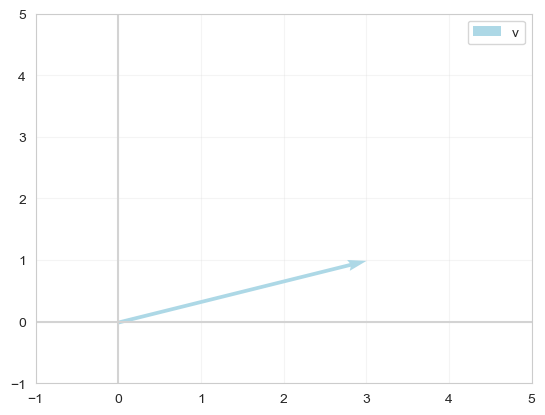

In [58]:
plot_vectors([v], ['lightblue'], ['v'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

Applying a matrix to a vector can linearly transform the vector, e.g. by rotating it or scaling it.

The identity matrix does not transform the vector.

In [20]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [21]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [22]:
v == Iv

array([ True,  True])

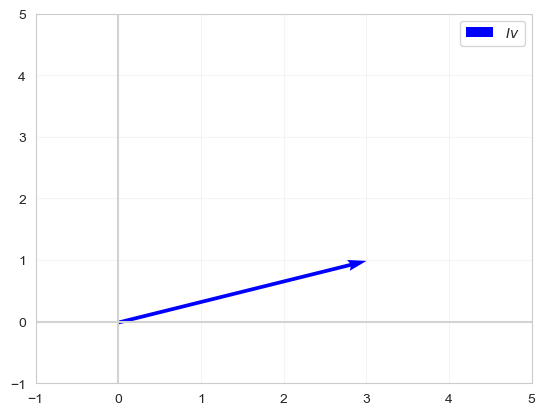

In [59]:
plot_vectors([Iv], ['blue'], [r'$Iv$'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In contrast, consider the matrix $E$:

In [24]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [25]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

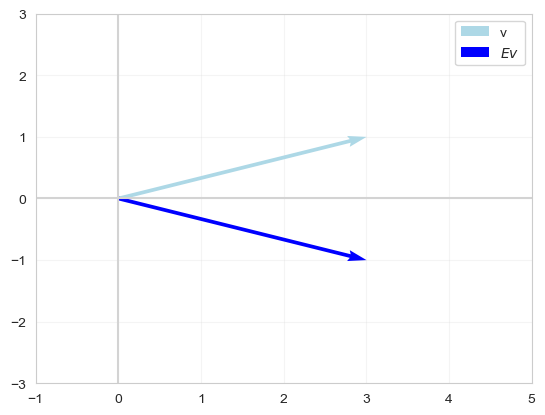

In [60]:
plot_vectors([v, Ev], ['lightblue', 'blue'], ['v', r'$Ev$'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Another matrix $F$ flips the vector $v$ over the $y$-axis:

In [27]:
F = np.array([[-1, 0], [0, 1]])
F

array([[-1,  0],
       [ 0,  1]])

In [28]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

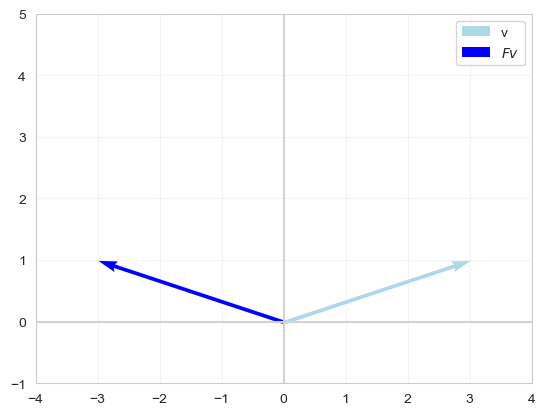

In [61]:
plot_vectors([v, Fv], ['lightblue', 'blue'], ['v', r'$Fv$'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Applying a flipping matrix is an example of an **affine transformation**: a *change in geometry* that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., reflection), other common affine transformations include:

- Scaling (changing the length of vectors)
- Shearing
- Rotation

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply the matrix $A$ to the vector $v$:

In [31]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [32]:
Av = np.dot(A, v)
Av

array([1, 4])

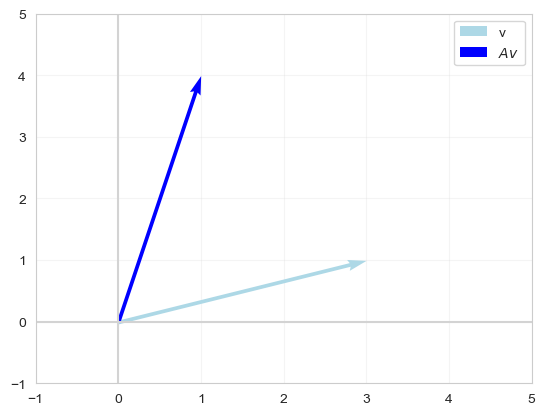

In [62]:
plot_vectors([v, Av], ['lightblue', 'blue'], ['v', r'$Av$'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

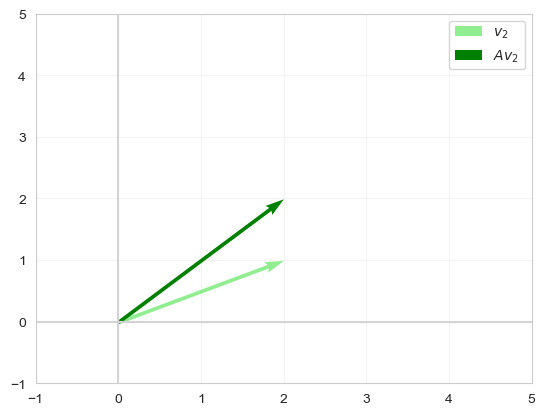

In [64]:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'],[r'$v_2$', r'$Av_2$'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

Separate vectors can be concatenated into a matrix, where each column is a separate vector. Whatever linear transformation is applied to the matrix, it will be independently applied to each column vector.

In [70]:
np.matrix(v).T

matrix([[3],
        [1]])

In [71]:
v3 = np.array([-3, -1])
v4 = np.array([-1, 1])

In [72]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [73]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [74]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [75]:
# function to convert column of matrix to 1D vector:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [76]:
vectorfy(V, 0)

array([3, 1])

In [77]:
vectorfy(V, 0) == v

array([ True,  True])

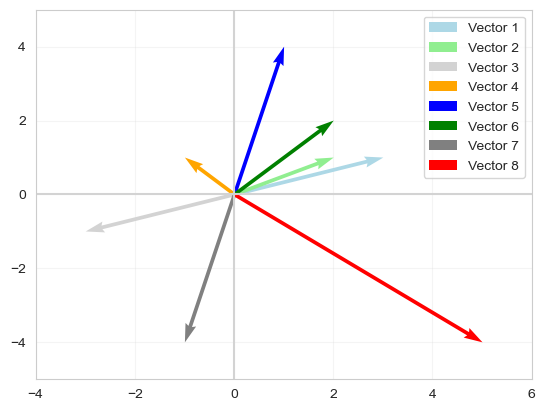

In [79]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)